### Make wheel plots

##### Load the mnist data

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
pixelData = mnist['data']
print(pixelData.shape)
digitData = mnist['target']
print(digitData.shape)

def strtonum(x):
    return int(x)
f = np.vectorize(strtonum)
digits = f(digitData)

(70000, 784)
(70000,)


#### Display 1st 4 digits as check 

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

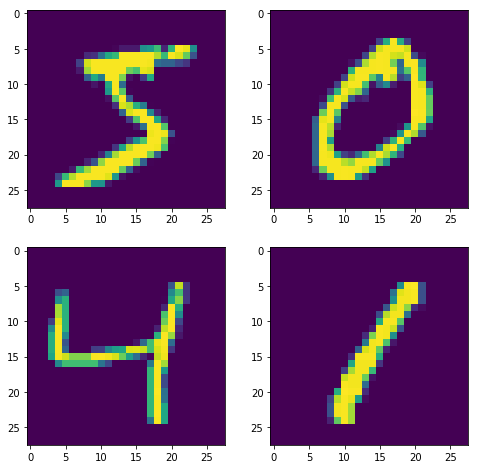

In [3]:
print(pixelData[0,:])
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(2,2,1)
plt.imshow(pixelData[0,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,2)
plt.imshow(pixelData[1,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,3)
plt.imshow(pixelData[2,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,4)
plt.imshow(pixelData[3,:].reshape(28,28), interpolation='nearest')

### Subsample the digits (can be used for fast tests if needed)

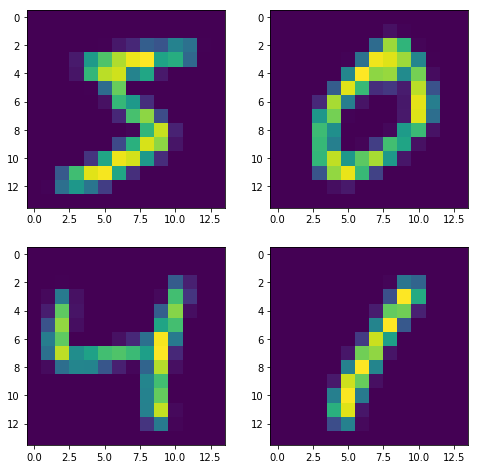

In [4]:
from PIL import Image

uintPixelData = pixelData.astype(np.uint8)
def shrink(imgarray, oldsize, newsize):
    squareImgArray = np.reshape(imgarray, (oldsize, oldsize))
    # print(squareImgArray)

    image = Image.fromarray(squareImgArray, 'L')
    newimage = image.resize((newsize, newsize), Image.BICUBIC)
    return np.array(newimage.getdata()).reshape(newsize * newsize)

smallPixelData = np.ndarray(shape=(70000, 14*14), dtype=np.uint8)

for i in range(70000):
    smallPixelData[i] = shrink(uintPixelData[i,:], 28, 14)

fig=plt.figure(figsize=(8, 8))    
fig.add_subplot(2,2,1)
plt.imshow(smallPixelData[0,:].reshape(14,14), interpolation='nearest')
fig.add_subplot(2,2,2)
plt.imshow(smallPixelData[1,:].reshape(14,14), interpolation='nearest')
fig.add_subplot(2,2,3)
plt.imshow(smallPixelData[2,:].reshape(14,14), interpolation='nearest')
fig.add_subplot(2,2,4)
plt.imshow(smallPixelData[3,:].reshape(14,14), interpolation='nearest')
    
    

#### Make a umap plot

In [5]:
import umap
print(umap)
reducer = umap.UMAP(random_state=42)
reducer.fit(pixelData[0:60000, :])
Umap60000 = reducer.transform(pixelData[0:60000, :])
Umap60000.shape

<module 'umap' from 'C:\\Users\\bvanlew\\Anaconda3\\envs\\py37testing\\lib\\site-packages\\umap\\__init__.py'>


(60000, 2)

In [6]:
print(Umap60000[0:20,:])

[[  2.4333591    2.060064  ]
 [  9.891552     1.9406934 ]
 [ -2.426694     8.426203  ]
 [ -7.5403957   -4.994912  ]
 [ -4.0048823    4.9750357 ]
 [  0.33157864  -6.526198  ]
 [ -4.275525   -10.363972  ]
 [  1.9245415   -2.7007015 ]
 [ -4.878547   -10.227855  ]
 [ -5.318428     8.500303  ]
 [  2.6470013   -2.1980343 ]
 [  0.3591237    3.3076813 ]
 [  1.8995025   -0.7541539 ]
 [  8.505878    -4.451512  ]
 [ -4.2307568   -9.434031  ]
 [ -7.6992035    2.709825  ]
 [ -0.2716183   -7.6203747 ]
 [ -2.685856    -1.3707322 ]
 [  7.428878    -4.109917  ]
 [ -5.3305326    3.6582592 ]]


<U7
(10,)


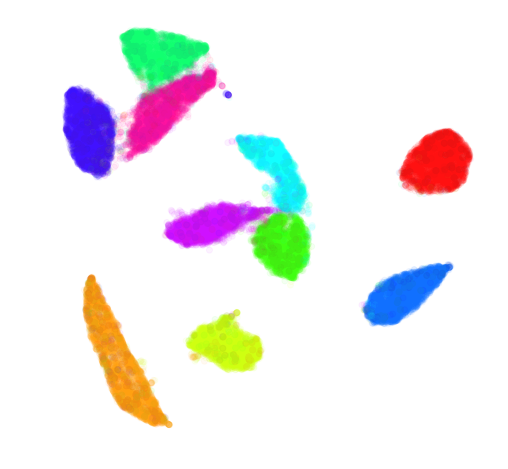

['iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAYAAAC+ZpjcAAEAAElEQVR4nOz9WZMkaZaeiT3nW1TVFt9izb223tFAd09jCGC4jJC8IC9I3vFv8GdRhHNDES4ioAhkQMgMhgSmB0tz0I1CV3XXllm5RISHL2amqt9yePGpupl7RmZlVkZmRWR9T4qnh5ubqaktGfbmOe95j6iqUqlUKpVKpVJ5aZjf9AlUKpVKpVKpfNuoAqtSqVQqlUrlJVMFVqVSqVQqlcpLpgqsSqVSqVQqlZdMFViVSqVSqVQqL5kqsCqVSqVSqVReMlVgVSqVSqVSqbxkqsCqVCqVSqVSeclUgVWpVCqVSqXykqkCq1KpVCqVSuUlUwVWpVKpVCqVykumCqxKpVKpVCqVl0wVWJVKpVKpVCovmSqwKpVKpVKpVF4yVWBVKpVKpVKpvGSqwKpUKpVKpVJ5yVSBValUKpVKpfKSqQKrUqlUKpVK5SVTBValUqlUKpXKS6YKrEqlUqlUKpWXjPtNn0Dl60PJZJRERqfLDILFIghycz3Q6Rr7S7n1+7vICy6rVCqVSqVSqALrW0AmE8iA4jBYDCORK3ZcsCOREQSLwWFpcXR4PJaMkIjodB2DQ8mTEDMIEIgAKIKiCILD4nG4WgStVCqVSuVTiKq+qEBReQ3IKJFEJKFAInNNz3O2nLPhgh3X9BigxdPisQiBTItjQYPBEIjkm3+KhAKIKAM9gYSieCwrOo5ZcMaKM1asaWnxKEXoySTTaoWrUqlUKr/N1ArWa0wi0xMYGLnWkadc8zOe8rd8wlO5YkdAETqEjoYGjwF2U0XKTTUqRad2YiaQAEPUTK+Jbd4x5EiShDXCsVnwQFY84phHnPKIIx5zwjFLGuxU2Srf3U0NrFKpVCqV3y6qwHpNmatXI4HnuuFfpb/lL9JP+Zk+4RN7zc72GGPo6HAISiYhGAxnLNgReM6OwEg7tQs9ZmobKiFmGMAPDdcMXLLj0u

{"dims": 2, "points": [[2.433, 2.06], [9.892, 1.941], [-2.427, 8.426], [-7.54, -4.995], [-4.005, 4.975], [0.332, -6.526], [-4.276, -10.364], [1.925, -2.701], [-4.879, -10.228], [-5.318, 8.5], [2.647, -2.198], [0.359, 3.308], [1.9, -0.754], [8.506, -4.452], [-4.231, -9.434], [-7.699, 2.71], [-0.272, -7.62], [-2.686, -1.371], [7.429, -4.11], [-5.331, 3.658], [-1.776, 8.107], [10.203, 1.837], [-4.88, 4.066], [-7.528, -4.888], [-5.055, -8.692], [-1.667, -6.496], [-4.065, 6.981], [2.154, -1.995], [-6.965, 2.654], [-7.051, 1.962], [1.962, -0.413], [-3.096, -1.409], [8.064, -3.71], [-5.455, 3.291], [8.939, 1.338], [0.605, 3.001], [7.557, -4.296], [9.347, 1.299], [-6.824, 5.097], [8.285, -4.268], [-5.923, -9.027], [-1.835, -1.192], [-6.604, 4.685], [-5.312, 3.838], [1.042, -1.253], [-4.002, 4.671], [-1.025, -0.391], [1.406, 3.173], [0.793, -0.999], [1.91, -2.247], [3.17, -1.27], [10.112, 2.819], [-8.166, 4.551], [-5.304, 7.243], [-4.135, 4.677], [-2.361, -0.693], [9.781, 3.573], [-4.656, 3.791

NameError: name 'Path' is not defined

In [8]:
import json
import base64
from io import BytesIO
import os

colors = np.array(['#FF0000', '#FF9900', '#CCFF00', '#33FF00', '#00FF66', '#00FFFF', '#0066FF', '#3300FF', '#CC00FF', '#FF0099'])
print(colors.dtype)
print(colors.shape)
digitColor60000 = colors[digits[0:60000]]

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(Umap60000[:,0], Umap60000[:,1], alpha=0.05, c=digitColor60000)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('umap60000_all.png', bbox_inches=extent)
plt.show()

def createScaledThumbnailsForImage(image_file_name):
    root, _ = os.path.splitext(image_file_name)
    image_string_array = []
    im = Image.open(image_file_name)
    im600 = im.resize((600, 600), Image.BICUBIC)
    im600.save(root + '_600.png')
    buffered_600 = BytesIO()
    im600.save(buffered_600, format='PNG')
    im600_str = base64.b64encode(buffered_600.getvalue())
    image_string_array.append(im600_str.decode('ascii'))

    im300 = im.resize((300, 300), Image.BICUBIC)
    im300.save(root + '_300.png')
    buffered_300 = BytesIO()
    im300.save(buffered_300, format='PNG')
    im300_str = base64.b64encode(buffered_300.getvalue())
    image_string_array.append(im300_str.decode('ascii'))

    im150 = im.resize((150, 150), Image.BICUBIC)
    im150.save(root + '_150.png')
    buffered_150 = BytesIO()
    im150.save(buffered_150, format='PNG')
    im150_str = base64.b64encode(buffered_150.getvalue())
    image_string_array.append(im150_str.decode('ascii'))
    
    print(image_string_array)
    with open(root + '_imagestr.txt', 'w') as f:
        f.write('"image":["')
        f.write(image_string_array[0] + '","')
        f.write(image_string_array[1] + '","')   
        f.write(image_string_array[2] + '"]')        

createScaledThumbnailsForImage('umap60000_all.png')
Umap60000Round = [[round(y,3) for y in x] for x in Umap60000.tolist()]
UmapMNIST60000 = {"dims": 2, "points": Umap60000Round}
print(json.dumps(UmapMNIST60000))
Path('MNIST60000_umap_plot.json').write_text(json.dumps(UmapMNIST60000))

intDigits = digits.astype(np.uint8)

UmapMNIST60000_props = {"voxel_props": {"label": intDigits.tolist()}}
print(json.dumps(UmapMNIST60000_props))

### Split into three sub plots for a simulated hierarchy demo

- Digits 3,5,8
- Digits 4,7,9
- Digits 0,1,2,6

In [9]:
from functools import reduce
pixel60000 = pixelData[0:60000,:] 
digits60000 = digits[0:60000]
print(pixel60000.shape)

ind3 = np.where(digits60000 == 3)[0]
ind5 = np.where(digits60000 == 5)[0]
ind8 = np.where(digits60000 == 8)[0]
index358 = np.sort(np.concatenate((ind3, ind5, ind8)))

ind4 = np.where(digits60000 == 4)[0]
ind7 = np.where(digits60000 == 7)[0]
ind9 = np.where(digits60000 == 9)[0]
index479 = np.sort(np.concatenate((ind4, ind7, ind9)))

ind0 = np.where(digits60000 == 0)[0]
ind1 = np.where(digits60000 == 1)[0]
ind2 = np.where(digits60000 == 2)[0]
ind6 = np.where(digits60000 == 6)[0]
index0126 = np.sort(np.concatenate((ind0, ind1, ind2, ind6)))

print(index358[0:20])
print(index479[0:20])
print(index0126[0:20])

digits358 = digits60000[index358]
pixels358 = pixel60000[index358]
print(digits358[0:20])

digits479 = digits60000[index479]
pixels479 = pixel60000[index479]
print(digits479[0:20])

digits0126 = digits60000[index0126]
pixels0126 = pixel60000[index0126]
print(digits0126[0:20])

print(digits358.shape[0] + digits479.shape[0] +  digits0126.shape[0])
print(pixels358.shape)
print(pixels479.shape)
print(pixels0126.shape)

MNIST60000_358_props = {"voxel_props": {"label": digits358.tolist()}}
with open('MNIST60000_358_props.json', 'w') as f:
    f.write(json.dumps(MNIST60000_358_props))
print('358 props\n')
print(json.dumps(MNIST60000_358_props))
MNIST60000_479_props = {"voxel_props": {"label": digits479.tolist()}}
with open('MNIST60000_479_props.json', 'w') as f:
    f.write(json.dumps(MNIST60000_479_props))
print('479 props\n')
print(json.dumps(MNIST60000_479_props))
MNIST60000_0126_props = {"voxel_props": {"label": digits0126.tolist()}}
with open('MNIST60000_0126_props.json', 'w') as f:
    f.write(json.dumps(MNIST60000_0126_props))
print('0126 props\n')            
print(json.dumps(MNIST60000_0126_props))

(60000, 784)
[ 0  7 10 11 12 17 27 30 31 35 41 44 46 47 49 50 55 65 74 85]
[ 2  4  9 15 19 20 22 26 29 33 38 42 43 45 48 52 53 54 57 58]
[ 1  3  5  6  8 13 14 16 18 21 23 24 25 28 32 34 36 37 39 40]
[5 3 3 5 3 8 3 3 8 5 8 3 8 5 3 3 8 5 3 8]
[4 9 4 7 9 4 9 4 7 9 7 7 9 9 9 7 4 9 9 4]
[0 1 2 1 1 6 1 2 6 0 1 1 2 2 6 0 6 0 6 1]
60000
(17403, 784)
(18056, 784)
(24541, 784)
358 props

{"voxel_props": {"label": [5, 3, 3, 5, 3, 8, 3, 3, 8, 5, 8, 3, 8, 5, 3, 3, 8, 5, 3, 8, 3, 8, 8, 3, 5, 3, 3, 8, 3, 5, 3, 3, 8, 5, 8, 5, 8, 3, 3, 8, 5, 5, 3, 3, 5, 8, 5, 8, 3, 8, 3, 3, 3, 5, 8, 3, 3, 5, 5, 8, 3, 5, 8, 3, 3, 3, 5, 8, 5, 5, 5, 3, 3, 5, 5, 3, 8, 3, 8, 5, 8, 5, 3, 3, 5, 3, 5, 8, 5, 3, 8, 8, 8, 3, 3, 8, 5, 8, 3, 8, 5, 5, 8, 3, 5, 8, 5, 8, 5, 3, 3, 5, 8, 8, 3, 8, 3, 5, 8, 5, 3, 5, 8, 3, 3, 3, 5, 8, 3, 5, 8, 5, 3, 5, 5, 5, 5, 8, 5, 8, 8, 5, 8, 3, 5, 5, 8, 3, 3, 5, 3, 8, 3, 8, 3, 8, 5, 3, 8, 8, 5, 3, 5, 8, 5, 5, 5, 8, 8, 3, 5, 3, 3, 5, 5, 3, 3, 3, 5, 8, 5, 8, 3, 5, 8, 8, 3, 5, 8, 5, 8, 8, 3, 8, 8, 8, 5, 5

#### Calculate the tSNE embeddings

In [10]:
import nptsne
tsne = nptsne.TextureTsne()
tSNE358 = tsne.fit_transform(pixels358.astype(np.float32))
print(tSNE358.shape)
tsne = nptsne.TextureTsne()
tSNE479 = tsne.fit_transform(pixels479.astype(np.float32))
print(tSNE479.shape)
tsne = nptsne.TextureTsne()
tSNE0126= tsne.fit_transform(pixels0126.astype(np.float32))
print(tSNE0126.shape)

(34806,)
(36112,)
(49082,)


#### Plot tSNE embeddings to check

In [11]:
colors = np.array(['#FF0000', '#FF9900', '#CCFF00', '#33FF00', '#00FF66', '#00FFFF', '#0066FF', '#3300FF', '#CC00FF', '#FF0099'])
print(colors.dtype)
print(colors.shape)
digitColor60000 = colors[digits[0:60000]]


<U7
(10,)


In [1]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(tSNE358[0::2], tSNE358[1::2], c=digitColor60000[index358], alpha=0.05)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('tsne60000_358.png', bbox_inches=extent)
plt.show()

print(tSNE358.shape)
tSNE358_list = tSNE358.tolist()
print(tSNE358_list)
#MNIST60000_358_tsne_Round_x = [round(x,3) for x in tSNE358_list[::2]]
#MNIST60000_358_tsne_Round_y = [round(y,3) for y in tSNE358_list[1::2]]
#MNIST60000_358_tsne_Round = zip(MNIST60000_358_tsne_Round_x,MNIST60000_358_tsne_Round_y)
#MNIST60000_tsne_358 = {"dims": 2, "points": MNIST60000_358_tsne_Round}
#print(json.dumps(MNIST60000_tsne_358))
#Path('MNIST60000_358_tsne_plot.json').write_text(json.dumps(MNIST60000_tsne_358))

NameError: name 'plt' is not defined

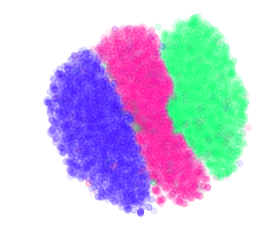

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(tSNE479[0::2], tSNE479[1::2], c=digitColor60000[index479], alpha=0.05)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('tsne60000_479.png', bbox_inches=extent)
plt.show()

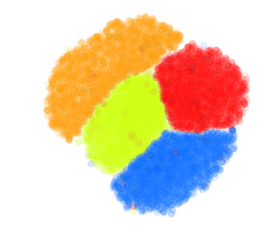

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(tSNE0126[0::2], tSNE0126[1::2], c=digitColor60000[index0126], alpha=0.05)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('tsne60000_0126.png', bbox_inches=extent)
plt.show()

#### Calculate umap embeddings

In [153]:
reducer = umap.UMAP(random_state=42)
reducer.fit(pixels358[0:60000, :])
Umap358 = reducer.transform(pixels358[0:60000, :])
Umap358.shape

reducer = umap.UMAP(random_state=42)
reducer.fit(pixels479[0:60000, :])
Umap479 = reducer.transform(pixels479[0:60000, :])
Umap479.shape

reducer = umap.UMAP(random_state=42)
reducer.fit(pixels0126[0:60000, :])
Umap0126 = reducer.transform(pixels0126[0:60000, :])
Umap0126.shape

(24541, 2)

#### Plot umap embeddings to check

### Umap 358

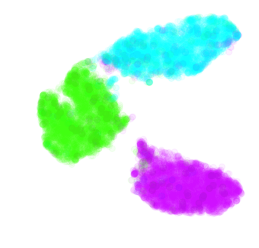

['iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAYAAAC+ZpjcAAEAAElEQVR4nOz9eZfkSK7lCf4gQjVzc48tM9+revW6u/qcnjPf/yvNTHdVvSUzItI3M1OlCOYPACIgTc3dY/eIJPzQVU2Vi1BIJa5cXAFEVZXDDjvssMMOO+yww342K791Aw477LDDDjvssMP+aHYArMMOO+ywww477LCf2Q6Addhhhx122GGHHfYz2wGwDjvssMMOO+yww35mOwDWYYcddthhhx122M9sB8A67LDDDjvssMMO+5ntAFiHHXbYYYcddthhP7MdAOuwww477LDDDjvsZ7YDYB122GGHHXbYYYf9zHYArMMOO+ywww477LCf2Q6Addhhhx122GGHHfYz2wGwDjvssMMOO+yww35mOwDWYYcddthhhx122M9sB8A67LDDDjvssMMO+5lt+a0bcNhhhx122GGHhSn67HfyAz497Le2A2Addthhhx122LBr8ObXgTBKp9MxkJWBlvhSiMBTtKj8aq077IfaAbAOO+ywww47DID+DH9kMOaXBDKdjtJpNH/tDrIEdWClBJgS/wcVc+QTeh32udgBsA477LDDDvtDmvJxPiq4oo46uNEdyArmSCgIQnEwY3v5VAZJd6/5+Dhz1WmsNDqdC0pDaYgzW8VbF0cvFAoLjOXkr9WXnwsQ5n6MV0mvB4N23Q6Addhhhx122B/OFGhA9yXYn2B9BAZTtLJyobP6sgdm4iBLWKhUKoUTMtijE8+DjNhXbsfcr8G6zurwziDeBXgALsDZgdaFwiMrKwVlobBQESrCAtwAL3258+XncvAKrOkccsAywNxhT+0AWIcddthhh/1hLIDVmpaWvg+AVZ21urBy5sIjzUGW0pjAyAJ0xhcJyoJyYuEW4QbhNu3zWoguwFVjAj71b4ybWmkOoxrKCjwivEd4QHhEOdN5oPMeA14dpVJYUAd5wgvgS1++9mO84qeBn+jLRwzsRV

In [197]:

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(Umap358[:,0], Umap358[:,1], alpha=0.05, c=digitColor60000[index358])
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('umap60000_358.png', bbox_inches=extent)
plt.show()
createScaledThumbnailsForImage('umap60000_358.png')

### Umap 479

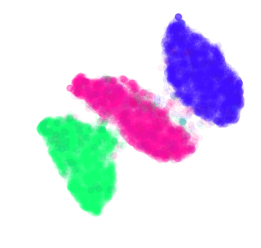

['iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAYAAAC+ZpjcAAEAAElEQVR4nOz9a3cbS5IkippHZAIgKe1HVfXpmXXWOev8/99zP93Hmpme7qru2ntL4gtAZka43w/uHhEAQYqSqM2HwrRSAIFEvpDIsDR3NycREXR0dHR0dHR0dDwZwnNvQEdHR0dHR0fHW0MnWB0dHR0dHR0dT4xOsDo6Ojo6Ojo6nhidYHV0dHR0dHR0PDE6wero6Ojo6OjoeGJ0gtXR0dHR0dHR8cToBKujo6Ojo6Oj44nRCVZHR0dHR0dHxxOjE6yOjo6Ojo6OjidGJ1gdHR0dHR0dHU+MTrA6Ojo6Ojo6Op4YnWB1dHR0dHR0dDwxOsHq6Ojo6Ojo6HhidILV0dHR0dHR0fHEGJ57Azo6Ojo6XgfE/mMGhOvfAAACyKZAAPXb944fHJ1gdXR0dHQ8GvMM7G6BaavPU9LXhxFYr4H1GXB2DqzWz7udHR3PjU6wOjo6Ojo+CwEwzcDtNfDpN+DqI7C9AfZ7fX9zBrz7CXj/M/DL34D3ERj7CNPxA6Of/h0dHR0dJyEWDkwLcHsDXF8Cl38AH/6pjwcEa6ME66dflYT98jf9++wCWK2A0EOGHT8YOsHq6Ojo6DgJZmC/U2L1n/8L+Pv/Aj78F3D9UQnXtGtChBFYb4CLn4Cf/wr85V+Bf/2/gP/+/wB/+RdgDAA96950dPy56ASro6Ojo+Mklhm4uQJ++wfwP//fwP/4fwG//6eSrmUCctZkdwCAaHL76kxJ1q//qkrWsAHW58DFO2CMmgTf0fEjoBOsjo6Ojo47YNYQ4O//Bfzj34D//Dfgt78Dn35X1UqkIVcA2MjWfmehwx0wrIB3vwLjCvjbvwI//azhwo6OHwGdYHV0dHR03EFOmsj+9/8B/O//L/D7P4DtrRKpEIEY67wiOj9nQDKw3wKctJJwc2ZELAObdSdYHT8OOsHq6Ojo6LiDZVaC9V//Dvzjf6

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(Umap479[:,0], Umap479[:,1], alpha=0.05, c=digitColor60000[index479])
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('umap60000_479.png', bbox_inches=extent)
plt.show()
createScaledThumbnailsForImage('umap60000_479.png')

### Umap 0126

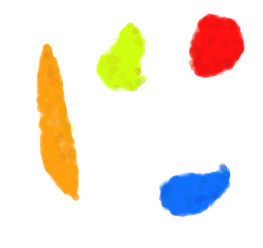

['iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAYAAAC+ZpjcAAEAAElEQVR4nOz9aXPjPLatiz4AKcl9tm9btapq1Tp77bNPEyfi/P8fcL/duLF3rL66t94uOzeyWpLAvB8mIEI0ZcuZstN2YmQwJUvsJJHAwJgDcxoRETIyMjIyMjIyMnYG+7lPICMjIyMjIyPjqSETrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHSMTrIyMjIyMjIyMHaP83CeQkZGRkZHxxUKk/zmAMdf/nfGgkQlWRkZGRkbG54IIeN8uIkqkjAFrdYl/ZzwqZIKVkZGRkZFxnxDRxTmoa2gafXROF2OgKKAs9TEukWzF5xkPGplgZWRkZGRk3DW6pKqqYLGA+VyXxQKWSyVboCRqMNBlONQlPh8MlHylBCyqXKkCBpsfM+4cmWBlZGRkZGTcNUSUPC0WcHkJ4zGcn8PZmT5eXsJ0qiTLe1WoBgMYjeDwEI6O4PhYl/19JVqjEezt6d9l2RIsa1uVq7tAJln3hEywMjIyMjIy7hIiqlotFkqsPnyAt2/hzRt9fPdOidblpapZUcUqSyVPx8fw7Bm8egUvXyrhisTq+FjJ197eeggxql9lqY8x5FiW62Qr486QCVZGRkZGRsZdwXslV9MpXFwouXrzBn75RR/fvdPXLi50ncVC1/deyVIkWUdH8Py5LpFQxdcPD+HgoA0lDof6flS44vO4xDBjUXzub+dJIxOsjIyMjIyMu4JzMJupQvXmDfz6q5KrX39VchXDg1G5irMKq0r/7qpZBwf6GInT3p4SpoMDODlRRSsSroODNrR4dLROxg4PM8G6Y2

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(Umap0126[:,0], Umap0126[:,1], alpha=0.05, c=digitColor60000[index0126])
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('umap60000_0126.png', bbox_inches=extent)
plt.show()
createScaledThumbnailsForImage('umap60000_0126.png')

### Create the new layouthierarchy.json from the template

In [200]:
from pathlib import Path
layout_template = Path('layouthierarchy_template.txt').read_text()
Umap_ALL_image = Path('umap60000_all_imagestr.txt').read_text()
Umap_358_image = Path('umap60000_358_imagestr.txt').read_text()
Umap_479_image = Path('umap60000_479_imagestr.txt').read_text()
Umap_0126_image = Path('umap60000_0126_imagestr.txt').read_text()
layout = layout_template.replace('$Umap_ALL_image$', Umap_ALL_image)
layout = layout.replace('$Umap_358_image$', Umap_358_image)
layout = layout.replace('$Umap_479_image$', Umap_479_image)
layout = layout.replace('$Umap_0126_image$', Umap_0126_image)
Path('layouthierarchy.json').write_text(layout)

1058369